In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve , auc , classification_report , roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score
from imblearn.over_sampling import SMOTE 
import pickle 


In [3]:
credit_card = pd.read_csv('dataset/creditcard.csv')
credit_card.drop('V15', axis =1 , inplace =True)
X= credit_card.drop("Class", axis = 1)
y = credit_card["Class"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

In [5]:
y_train.value_counts()

Class
0    170583
1       301
Name: count, dtype: int64

In [6]:
smote = SMOTE(sampling_strategy = {1: 20000}) #only oversampling the minorty classes to certain extent only 
X_resampled , y_resampled = smote.fit_resample(X_train, y_train)

In [7]:
y_resampled.value_counts() # we can see the number of  value for the minority class 1 to be 20000

Class
0    170583
1     20000
Name: count, dtype: int64

In [8]:
'''
THe parameters was generated without oversampling , the below one was generated after oversampling and running on kaggle 
best_params =  {'bootstrap': False, 'max_depth': 13, 
                'max_features': 'sqrt', 'min_samples_leaf': 5,
                'min_samples_split': 4, 'n_estimators': 746}
'''
# best_params =  {'bootstrap': True, 'max_depth': 19, 'max_features': 'log2', 
#                 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 666}
best_params = {'bootstrap': True, 'max_depth': 19, 'max_features': 'log2', 
               'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 666}
# Best parameters from the hyperparameter tunining /

In [9]:
rf_model = RandomForestClassifier(**best_params)

In [10]:
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=19, max_features='log2', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=666)

In [11]:
y_pred  = rf_model.predict(X_test)
result =  classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.83      0.86      0.84       191

    accuracy                           1.00    113923
   macro avg       0.91      0.93      0.92    113923
weighted avg       1.00      1.00      1.00    113923



In [12]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)


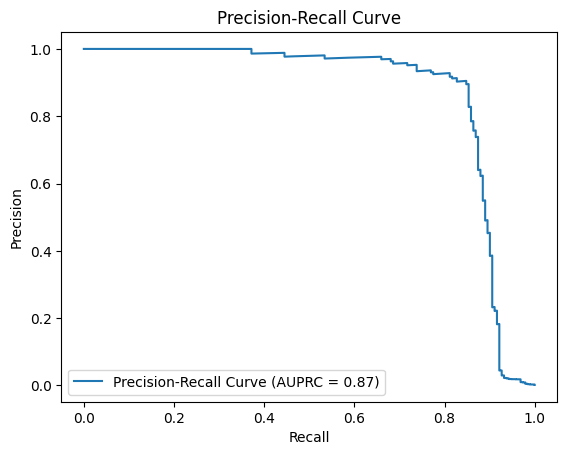

In [13]:
# Plot the Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve (AUPRC = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [16]:
# this is the maximum score we were able to achive given the data is extremely unbalanced 

In [ ]:
auc_roc = roc_auc_score(y_test, y_pred_proba)
auc_roc
# auc_roc is high but what we for the case of the precision recall curve which is better in the case for the imbalanced data 
# so the max auprc is 0.87 which we will be using in our webapp 


In [18]:
pickle.dump(rf_model, open('model.pkl', 'wb'))
